## Лабораторная работа №4. Регрессионный анализ данных.

#### Выполнила:
Плохута Д.Г.
#### Группа: 
19-ИВТ-3  
#### Вариант:
№6 
#### Набор данных:
3 (air_quality)
#### Классификаторы:  
1 – линейная регрессия без использования регуляризаторов;  
2 – линейная регрессия, LASSO регуляризатор.
### 1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
0. Date - дата (ДД/ММ/ГГГГ)
1. Time - время (ЧЧ.ММ.СС)
2. CO(GT) - Истинная часовая усредненная концентрация CO в мг / м^3 (эталонный анализатор)
3. PT08.S1(CO) - PT08.S1 (оксид олова) часовой усредненный отклик датчика (номинально CO-таргетированный)
4. NMHC(GT) - Истинная почасовая усредненная общая концентрация неметаллических углеводородов в мкг / м^3 (эталонный анализатор)
5. C6H6(GT) - Истинная почасовая усредненная концентрация бензола в мкг / м^3 (эталонный анализатор)
6. PT08.S2(NMHC) - PT08.S2 (диоксид титана) часовой усредненный отклик датчика (номинально для nmhc)
7. NOx(GT) - Истинная почасовая усредненная концентрация NOx в ppb (эталонный анализатор)
8. PT08.S3(NOx)	 - PT08.S3 (оксид вольфрама) среднечасовой отклик датчика (номинально на NOx)
9. NO2(GT) - Истинная среднечасовая концентрация NO2 в мкг/м^3 (эталонный анализатор)
10. PT08.S4(NO2) - PT08.S4 (оксид вольфрама) среднечасовой отклик датчика (номинально на NО2)
11. PT08.S5(O3)	 - PT08.S5 (оксид индия) среднечасовой отклик датчика (номинально на O3)
12. T	 - Температура в °C
13. RH - Относительная влажность (%)
14. AH  - Абсолютная влажность

### 2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

In [2]:
air_df = pd.read_csv('C:\\Users\\Acer\\Desktop\\уник\\мо\\AirQualityUCI.csv')
air_df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/3/2004,18.00.00,2.6,1360,150.0,11.9,1046,166,1056,113,1692,1268.0,13.6,48.9,0.7578
1,10/3/2004,19.00.00,2.0,1292,112.0,9.4,955,103,1174,92,1559,972.0,13.3,47.7,0.7255
2,10/3/2004,20.00.00,2.2,1402,88.0,9.0,939,131,1140,114,1555,1074.0,11.9,54.0,0.7502
3,10/3/2004,21.00.00,2.2,1376,80.0,9.2,948,172,1092,122,1584,1203.0,11.0,60.0,0.7867
4,10/3/2004,22.00.00,1.6,1272,51.0,6.5,836,131,1205,116,1490,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,4/4/2005,10.00.00,3.1,1314,-200.0,13.5,1101,472,539,190,1374,1729.0,21.9,29.3,0.7568
9353,4/4/2005,11.00.00,2.4,1163,-200.0,11.4,1027,353,604,179,1264,1269.0,24.3,23.7,0.7119
9354,4/4/2005,12.00.00,2.4,1142,-200.0,12.4,1063,293,603,175,1241,1092.0,26.9,18.3,0.6406
9355,4/4/2005,13.00.00,2.1,1003,-200.0,9.5,961,235,702,156,1041,770.0,28.3,13.5,0.5139


In [3]:
init_len= len(air_df)
air_df.drop_duplicates(keep= False,inplace=True)
finit_len = len(air_df)
print("Удалено дубликатов: " , init_len - finit_len)

Удалено дубликатов:  0


In [4]:
air_df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/3/2004,18.00.00,2.6,1360,150.0,11.9,1046,166,1056,113,1692,1268.0,13.6,48.9,0.7578
1,10/3/2004,19.00.00,2.0,1292,112.0,9.4,955,103,1174,92,1559,972.0,13.3,47.7,0.7255
2,10/3/2004,20.00.00,2.2,1402,88.0,9.0,939,131,1140,114,1555,1074.0,11.9,54.0,0.7502
3,10/3/2004,21.00.00,2.2,1376,80.0,9.2,948,172,1092,122,1584,1203.0,11.0,60.0,0.7867
4,10/3/2004,22.00.00,1.6,1272,51.0,6.5,836,131,1205,116,1490,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,4/4/2005,10.00.00,3.1,1314,-200.0,13.5,1101,472,539,190,1374,1729.0,21.9,29.3,0.7568
9353,4/4/2005,11.00.00,2.4,1163,-200.0,11.4,1027,353,604,179,1264,1269.0,24.3,23.7,0.7119
9354,4/4/2005,12.00.00,2.4,1142,-200.0,12.4,1063,293,603,175,1241,1092.0,26.9,18.3,0.6406
9355,4/4/2005,13.00.00,2.1,1003,-200.0,9.5,961,235,702,156,1041,770.0,28.3,13.5,0.5139


### 3.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию)

In [5]:
# удалим две последние колонки
#air_df = air_df.drop(columns='Unnamed: 15')
#air_df = air_df.drop(columns='Unnamed: 16')
numerical = [c for c in air_df.columns if air_df[c].dtype.name != 'object']
print("Количественные признаки: ", numerical)

Количественные признаки:  ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']


<AxesSubplot:>

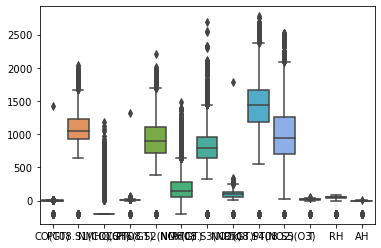

In [6]:
import seaborn as sns
before_scaling = numerical
sns.boxplot(data = air_df[before_scaling])

#### Нормализация

In [7]:
import sklearn as skl
from sklearn.preprocessing import MinMaxScaler

<AxesSubplot:>

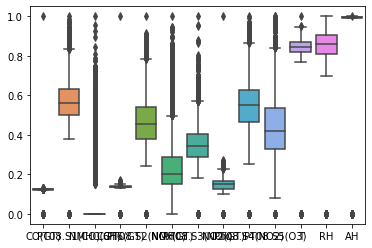

In [8]:
air_df[before_scaling] = MinMaxScaler().fit_transform(air_df[before_scaling])
sns.boxplot(data = air_df[before_scaling])

### 4.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены

In [9]:
categorical = [c for c in air_df.columns if air_df[c].dtype.name == 'object']
print("Категориальные признаки: ", categorical)

Категориальные признаки:  ['Date', 'Time']


In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in list(air_df):
    air_df[column] = pd.Series(label_encoder.fit_transform(air_df[column])) 
air_df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,18,19,26,666,137,119,623,163,700,108,986,978,146,381,1896
1,18,20,20,598,102,94,532,100,818,87,853,682,143,369,1727
2,18,21,22,708,79,90,516,128,784,109,849,784,129,432,1853
3,18,22,22,682,71,92,525,169,736,117,878,913,120,492,2056
4,18,23,16,578,42,65,413,128,848,111,784,820,122,488,2066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,325,11,31,620,0,135,678,468,183,185,668,1422,229,185,1889
9353,325,12,24,469,0,114,604,350,248,174,558,979,253,129,1658
9354,325,13,24,448,0,124,640,290,247,170,535,802,279,75,1358
9355,325,14,21,309,0,95,538,232,346,151,336,480,293,28,897


### 5.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других

<AxesSubplot:>

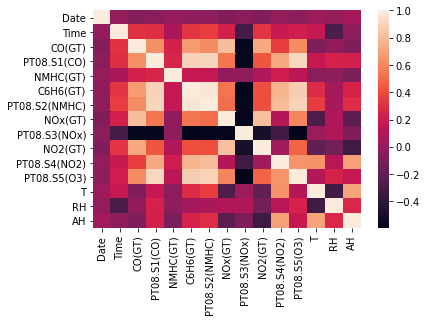

In [11]:
corr_matrix = air_df.corr()
sns.heatmap(corr_matrix)

### 6.	Заполните пропущенные значения в данных

In [12]:
air_df.count()

Date             9357
Time             9357
CO(GT)           9357
PT08.S1(CO)      9357
NMHC(GT)         9357
C6H6(GT)         9357
PT08.S2(NMHC)    9357
NOx(GT)          9357
PT08.S3(NOx)     9357
NO2(GT)          9357
PT08.S4(NO2)     9357
PT08.S5(O3)      9357
T                9357
RH               9357
AH               9357
dtype: int64

#### Пропущенных значений нет

### 7.	Решите поставленную задачу регрессии в соответствии с заданием.  
#### При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии).  Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value.   

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVC
air_df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,18,19,26,666,137,119,623,163,700,108,986,978,146,381,1896
1,18,20,20,598,102,94,532,100,818,87,853,682,143,369,1727
2,18,21,22,708,79,90,516,128,784,109,849,784,129,432,1853
3,18,22,22,682,71,92,525,169,736,117,878,913,120,492,2056
4,18,23,16,578,42,65,413,128,848,111,784,820,122,488,2066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,325,11,31,620,0,135,678,468,183,185,668,1422,229,185,1889
9353,325,12,24,469,0,114,604,350,248,174,558,979,253,129,1658
9354,325,13,24,448,0,124,640,290,247,170,535,802,279,75,1358
9355,325,14,21,309,0,95,538,232,346,151,336,480,293,28,897


In [14]:
X_data, Y_data = air_df.drop(columns='CO(GT)', axis=1).values, air_df['CO(GT)']
x_train, x_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.3)

#### 1) Линейная регрессия без использования регуляризаторов

In [15]:
regulate = LinearRegression()
regulate.fit(x_train,y_train)
predict_regulate = regulate.predict(x_test)

In [16]:
from scipy.stats import pearsonr, spearmanr
pearson, p_value_Pearson = pearsonr(predict_regulate, y_test)
print("Кореляция Пирсона: ", pearson)
spearmen, p_value_Spearmen = spearmanr(predict_regulate, y_test)
print("Корреляция Спирмена: ", spearmen)
print("p-value (Пирсон):", p_value_Pearson)
print("p-value (Спирмен) :", p_value_Spearmen)

Кореляция Пирсона:  0.891445753148259
Корреляция Спирмена:  0.8566055577054338
p-value (Пирсон): 0.0
p-value (Спирмен) : 0.0


#### 2) Линейная регрессия, LASSO регуляризатор

In [17]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [18]:
lasso = Lasso()
params = {'alpha': np.arange(0.01, 1, 0.005)}
grid_search = GridSearchCV(lasso, params)
grid_search.fit(x_train, y_train)
best = grid_search.best_estimator_.alpha
print('Лучшее alpha:', best)

Лучшее alpha: 0.049999999999999996


In [19]:
lasso = Lasso(alpha=best)
lasso.fit(x_train,y_train)
predict_regulate = lasso.predict(x_test)
pearson, p_value_Pearson = pearsonr(predict_regulate, y_test)
print("Кореляция Пирсона: ", pearson)
spearmen, p_value_Spearmen = spearmanr(predict_regulate, y_test)
print("Корреляция Спирмена: ", spearmen)
print("p-value (Пирсон):", p_value_Pearson)
print("p-value (Спирмен) :", p_value_Spearmen)

Кореляция Пирсона:  0.8914481729978327
Корреляция Спирмена:  0.8566587568651319
p-value (Пирсон): 0.0
p-value (Спирмен) : 0.0
